In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
from collections import Counter
from statistics import mean

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud

In [4]:
import string
import re    
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize, TweetTokenizer   

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


In [7]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import roc_curve, confusion_matrix,hamming_loss, log_loss
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

### Reading Datasets

In [8]:
train_df = pd.read_csv("/content/drive/MyDrive/Data/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Data/test.csv")
test_y = pd.read_csv("/content/drive/MyDrive/Data/test_labels.csv")

### Data Exploration

In [9]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [13]:
print("             : Train : Test")
print("Rows         :",train_df.shape[0],":",test_df.shape[0])
print("Percentage   :",round(train_df.shape[0]*100/(train_df.shape[0]+test_df.shape[0])),"   :",round(test_df.shape[0]*100/(train_df.shape[0]+test_df.shape[0])))

             : Train : Test
Rows         : 159571 : 153164
Percentage   : 51    : 49


In [14]:
x=train_df.iloc[:,2:].sum()

rowsums=train_df.iloc[:,2:].sum(axis=1)
train_df['clean']=(rowsums==0)

train_df['clean'].sum()
print("Total comments = ",len(train_df))
print("Total clean comments = ",train_df['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


In [15]:
print("Check for missing values in Train dataset")
train_null_check=train_df.isnull().sum()
print(train_null_check)
print("Check for missing values in Test dataset")
test_null_check=test_df.isnull().sum()
print(test_null_check)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64


### EDA

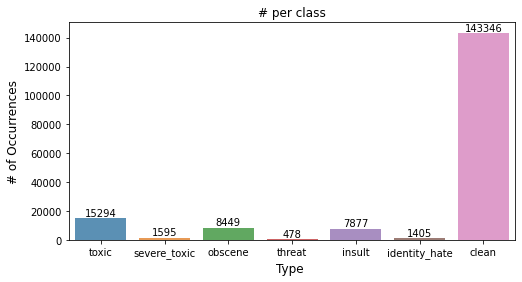

In [16]:
x=train_df.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax= sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

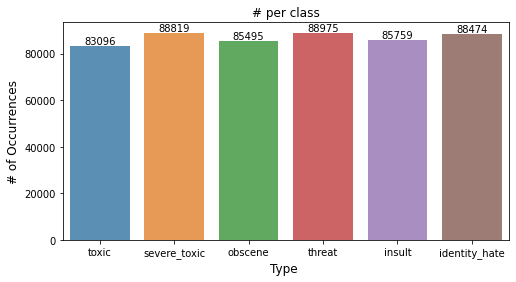

In [17]:
y=abs(test_y.iloc[:,1:].sum())
plt.figure(figsize=(8,4))
ax= sns.barplot(x = y.index, y = y.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = y.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

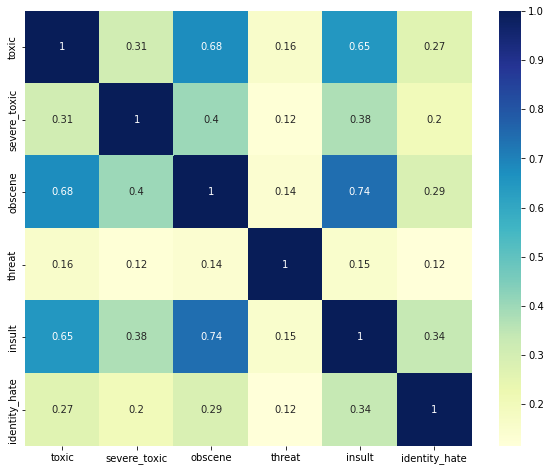

In [18]:
corr_df = train_df.iloc[:,2:-1]

corr=corr_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")
plt.show()

In [19]:
word_counter = {}
stop = stopwords.words('english')

def text_clean(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stop)])
    
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for category in categories:
    d = Counter()
    train_df[train_df[category] == 1]['comment_text'].apply(lambda t: d.update(text_clean(t).split()))
    word_counter[category] = pd.DataFrame.from_dict(d, orient='index')\
                                        .rename(columns={0: 'count'})\
                                        .sort_values('count', ascending=False)

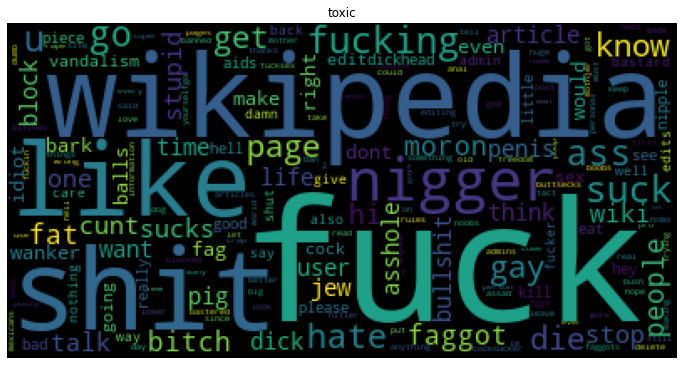

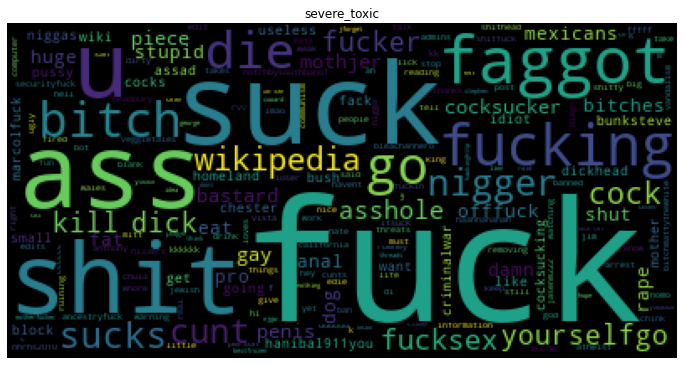

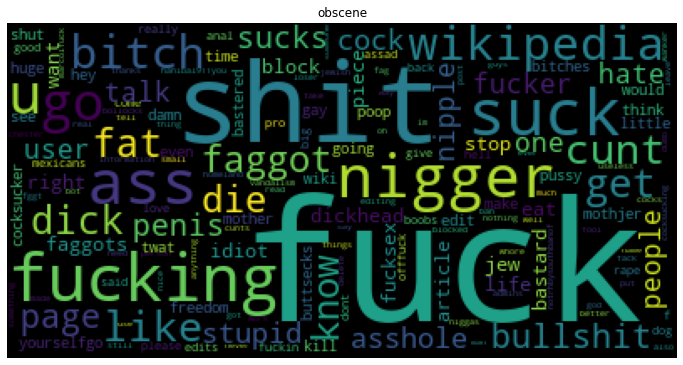

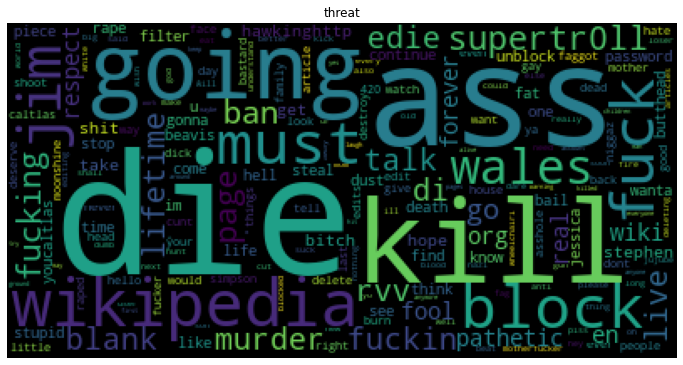

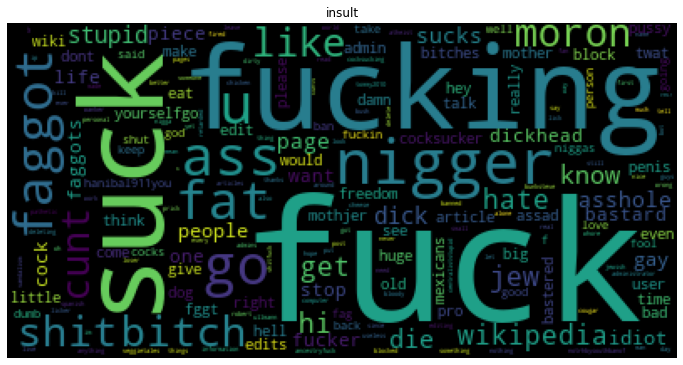

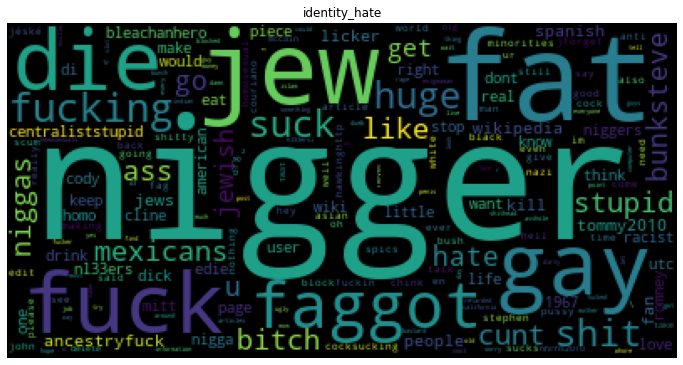

In [20]:
for word in word_counter:
    wc = word_counter[word]

    wordcloud = WordCloud(
          background_color='black',
          max_words=200,
          max_font_size=100, 
          random_state=4561
         ).generate_from_frequencies(wc.to_dict()['count'])

    fig = plt.figure(figsize=(12, 15))
    plt.title(word)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

### Data Pre-processing

In [21]:
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]
def tokenize(text):

    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunctuation = regex.sub(" ", text)
    words = nopunctuation.split(' ')
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [word for word in words if len(word) > 2]
    return words

## Baseline Models

In [22]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X_train = vector.fit_transform(train_df['comment_text'])
X_test = vector.transform(test_df['comment_text'])

In [23]:
vector.get_feature_names_out()[0:20]

array(['aaa', 'aap', 'aardvark', 'aaron', 'aba', 'abandon', 'abandoned',
       'abandoning', 'abandonment', 'abbas', 'abbey', 'abbott',
       'abbreviated', 'abbreviation', 'abc', 'abcnews', 'abd', 'abducted',
       'abduction', 'abdul'], dtype=object)

In [24]:
multinomialNB_clf = MultinomialNB()
logisticRegression_clf = LogisticRegression(max_iter=1000)
linearSVC_clf = LinearSVC()

In [25]:
def cross_validation_score(classifier, X_train, y_train):
    methods = []
    name = classifier.__class__.__name__.split('.')[-1]

    for label in test_labels:
        recall = cross_val_score(
            classifier, X_train, y_train[label], cv=10, scoring='recall')
        f1 = cross_val_score(classifier, X_train,
                             y_train[label], cv=10, scoring='f1')
        
        methods.append([name, label, recall.mean(), f1.mean()])

    return methods

In [26]:
multinomialNB_cv = pd.DataFrame(cross_validation_score(multinomialNB_clf, X_train, train_df))
logisticRegression_cv = pd.DataFrame(cross_validation_score(logisticRegression_clf, X_train, train_df))
linearSVC_cv = pd.DataFrame(cross_validation_score(linearSVC_clf, X_train, train_df))

In [27]:
methods_cv = pd.concat([multinomialNB_cv, logisticRegression_cv, linearSVC_cv])
methods_cv.columns = ['Model', 'Label', 'Recall', 'F1']
method_cv = methods_cv.reset_index()
method_cv[['Model', 'Label', 'Recall', 'F1']]

,Model,Label,Recall,F1
0,MultinomialNB,toxic,0.482999,0.636562
1,MultinomialNB,severe_toxic,0.021938,0.042244
2,MultinomialNB,obscene,0.469167,0.622148
3,MultinomialNB,threat,0.000000,0.000000
4,MultinomialNB,insult,0.367020,0.511394
5,MultinomialNB,identity_hate,0.007832,0.015346
6,LogisticRegression,toxic,0.610565,0.731389
7,LogisticRegression,severe_toxic,0.256431,0.351530
8,LogisticRegression,obscene,0.637002,0.747363
9,LogisticRegression,threat,0.123316,0.206632


### Model Evalution

In [28]:
def score(classifier, X_train, y_train, X_test, y_test):
    methods = []
    name = classifier.__class__.__name__.split('.')[-1]
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']

    for label in test_labels:
        classifier.fit(X_train, y_train[label])
        predicted = classifier.predict(X_test)

        predict_df[label] = predicted

        recall = recall_score(y_test[y_test[label] != -1][label],
                              predicted[y_test[label] != -1],
                              average="weighted")
        f1 = f1_score(y_test[y_test[label] != -1][label],
                      predicted[y_test[label] != -1],
                      average="weighted")

        conf_mat = confusion_matrix(y_test[y_test[label] != -1][label],
                                    predicted[y_test[label] != -1])
        
        roc = roc_auc_score(y_test[y_test[label] != -1][label],
                                    predicted[y_test[label] != -1])

        methods.append([name, label, recall, f1, conf_mat, roc])

    return methods

In [29]:
multinomialNB_methods = score(multinomialNB_clf, X_train, train_df, X_test, test_y)
logisticRegression_methods = score(logisticRegression_clf, X_train, train_df, X_test, test_y)
linearSVC_methods = score(linearSVC_clf, X_train, train_df, X_test, test_y)

In [30]:
multinomialNB_df = pd.DataFrame(multinomialNB_methods)
logisticRegression_df = pd.DataFrame(logisticRegression_methods)
linearSVC_df = pd.DataFrame(linearSVC_methods)
methods = pd.concat([multinomialNB_df, logisticRegression_df, linearSVC_df])
methods.columns = ['Model', 'Label', 'Recall', 'F1', 'Confusion_Matrix','ROC']
method = methods.reset_index()
method[['Model', 'Label', 'Recall', 'F1','ROC']]

,Model,Label,Recall,F1,ROC
0,MultinomialNB,toxic,0.935196,0.930919,0.755183
1,MultinomialNB,severe_toxic,0.994436,0.992145,0.531241
2,MultinomialNB,obscene,0.962987,0.957902,0.724747
3,MultinomialNB,threat,0.996702,0.995056,0.500000
4,MultinomialNB,insult,0.960158,0.953453,0.680955
5,MultinomialNB,identity_hate,0.988887,0.983408,0.501397
6,LogisticRegression,toxic,0.935728,0.937031,0.834818
7,LogisticRegression,severe_toxic,0.993123,0.992762,0.651134
8,LogisticRegression,obscene,0.965957,0.964267,0.798810
9,LogisticRegression,threat,0.996530,0.995725,0.577854


### Pipelines

In [31]:
pipe_multinominalNB = Pipeline([
    ('multinominal', MultinomialNB())
])

pipe_lr = Pipeline([
    ('lr', LogisticRegression(class_weight="balanced", max_iter=1000))
])

pipe_linear_svm = Pipeline([
    ('svm', LinearSVC(class_weight={1: 20}))
])
pipelines = [pipe_multinominalNB, pipe_lr, pipe_linear_svm]

In [32]:
score_df = []
for pipeline in pipelines:
    f1_values = []
    recall_values = []
    roc_values = []
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']
    for label in test_labels:

        pipeline.fit(X_train, train_df[label])
        predicted = pipeline.predict(X_test)
        predict_df[label] = predicted

        f1_values.append(f1_score(
            test_y[test_y[label] != -1][label], predicted[test_y[label] != -1], average="weighted"))
        recall_values.append(recall_score(
            test_y[test_y[label] != -1][label], predicted[test_y[label] != -1], average="weighted"))
        roc_values.append(roc_auc_score(test_y[test_y[label] != -1][label], predicted[test_y[label] != -1], average="weighted"))
        name = pipeline.steps[-1][1].__class__.__name__.split('.')[-1]

    values = [name, mean(f1_values), mean(recall_values), mean(roc_values)]
    score_df.append(values)

In [33]:
scores = pd.DataFrame(score_df,)
scores.columns = ['Model', 'F1', 'Recall', 'ROC']
scores

,Model,F1,Recall,ROC
0,MultinomialNB,0.968814,0.973061,0.615587
1,LogisticRegression,0.947936,0.934076,0.909572
2,LinearSVC,0.951509,0.941636,0.843099
